In [3]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

import warnings

import string
warnings.filterwarnings("ignore")

from nltk.tokenize import sent_tokenize, word_tokenize

#This is for stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import CountVectorizer

# dowloading packages using the following commands
import nltk
nltk.download('punkt')
#this is nltk stopword collection
nltk.download('stopwords')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aswin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#Loading the the data set from excel
df = pd.read_excel("C:/Users/aswin/OneDrive/SimplyAnalytics/WordCloud/SMSDataset.xlsx")

In [39]:
#Viewing the loaded dataframe
df

,Text,Classification
0,Urgent! call 09061749602 from Landline. Your c...,Spam
1,+449071512431 URGENT! This is the 2nd attempt ...,Spam
2,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,Spam
3,Urgent! call 09066612661 from landline. Your c...,Spam
4,WINNER!! As a valued network customer you have...,Spam
5,okmail: Dear Dave this is your final notice to...,Spam
6,07732584351 - Rodger Burns - MSG = We tried to...,Spam
7,URGENT! This is the 2nd attempt to contact U!U...,Spam
8,Congrats! Nokia 3650 video camera phone is you...,Spam
9,Urgent! Please call 0906346330. Your ABTA comp...,Spam


In [53]:
# Filtering it for Spam messages only
df2 = df.Classification.str.contains('Spam')
df3 = df[df2]
df3

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","£"]

for char in spec_chars:
    df3['Text'] = df3['Text'].str.replace(char, ' ')


#Applying the stemming by creating Stemmers
porter = PorterStemmer()
lancaster = LancasterStemmer()

#Converting to lower case
df3 = df3.apply(lambda x: x.astype(str).str.lower())
#Removing the extra spaces by trimming
df3 = df3.apply(lambda x: x.astype(str).str.strip())
#Removing the digits from the dataset
df3 = df3.apply(lambda x: x.astype(str).str.replace('\d+', ''))

df3 = df3.apply(lambda x: x.astype(str).str.replace('txt', 'text'))

#Applying porter stemmer to the dataset
df3 = df3.apply(lambda x: [porter.stem(y) for y in x])
#Applying lancaster stemmer to the dataset
df3 = df3.apply(lambda x: [lancaster.stem(y) for y in x])
df3


,Text,Classification
0,urgent call from landline your complimentar...,spam
1,urgent this is the nd attempt to contact u u...,spam
2,free for st week no nokia tone ur mob every ...,spam
3,urgent call from landline your complementar...,spam
4,winner as a valued network customer you have...,spam
5,okmail dear dave this is your final notice to...,spam
6,rodger burns msg we tried to call you r...,spam
7,urgent this is the nd attempt to contact u u ...,spam
8,congrats nokia video camera phone is your ca...,spam
9,urgent please call your abta complimentary ...,spam


In [54]:
#Coverting the data frame to list of strings
dfList = df3['Text'].astype(str).values.tolist()
print(dfList)

# using list comprehension to make the list of Strings to one string 
listString = ' '.join([str(elem) for elem in dfList]) 
''.join(e for e in string if e.isalnum())
print(listString) 


['urgent  call  from landline  your complimentary   tenerife holiday or    cash await collection sae t cs box  hp yf ppm ', ' urgent  this is the nd attempt to contact u u have won   call  b  t csbcmwcnxx  callcost ppm mobilesvary  max   ', 'free for st week  no nokia tone  ur mob every week just text nokia to  get texting and tell ur mates www getzed co uk pobox  wwq normp tone ', 'urgent  call  from landline  your complementary   tenerife holiday or    cash await collection sae t cs po box  wa px ppm   sender  hol off', 'winner   as a valued network customer you have been selected to receivea   prize reward  to claim call   claim code kl  valid  hours onli', 'okmail  dear dave this is your final notice to collect your   tenerife holiday or   cash award  call  from landline  tcs sae box cwwx ppm', '   rodger burns   msg   we tried to call you re your reply to our sms for a free nokia mobile   free camcorder  please call now  for delivery tomorrow', 'urgent  this is the nd attempt to c

TypeError: 'module' object is not iterable

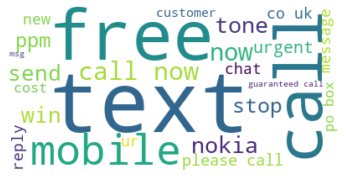

In [55]:
# Create stopword list:
stopwords_wc = set(STOPWORDS)
stopwords_wc.update(["landline"])

# Generate a word cloud image with white background
wordcloud = WordCloud(stopwords=stopwords_wc, background_color="white", max_words=25).generate(listString)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

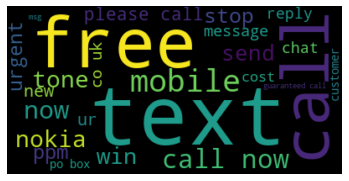

In [56]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords_wc, max_words=25).generate(listString)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Using nltk stop words to filter it
stop_words = stopwords.words('english')
stop_words.append('landline')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
# Converting the list of String into word tokens
word_tokens = word_tokenize(listString) 
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 

#Creating new list based on stopword check
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
#print(word_tokens) 
print(filtered_sentence) 

['urgent', '!', 'call', '.', 'complimentary', '*', 'tenerife', 'holiday', '£', ',', 'cash', 'await', 'collection', 'sae', '&', 'cs', 'box', 'hp', 'yf', 'ppm', '+', '+', 'urgent', '!', 'nd', 'attempt', 'contact', 'u', '!', 'u', '£', 'call', 'b', '&', 'csbcmwcnxx', '.', 'callcost', 'ppm', 'mobilesvary', '.', 'max£', '.', 'free', 'st', 'week', '!', 'nokia', 'tone', 'ur', 'mob', 'every', 'week', 'txt', 'nokia', 'get', 'txting', 'tell', 'ur', 'mates', 'www.getzed.co.uk', 'pobox', 'wwq', 'normp/tone', '+', 'urgent', '!', 'call', '.', 'complementary', '*', 'tenerife', 'holiday', '£', ',', 'cash', 'await', 'collection', 'sae', '&', 'cs', 'po', 'box', 'wa', 'px', 'ppm', '+', 'sender', ':', 'hol', 'winner', '!', '!', 'valued', 'network', 'customer', 'selected', 'receivea', '£', 'prize', 'reward', '!', 'claim', 'call', '.', 'claim', 'code', 'kl', '.', 'valid', 'hours', '.', 'okmail', ':', 'dear', 'dave', 'final', 'notice', 'collect', '*', 'tenerife', 'holiday', '#', 'cash', 'award', '!', 'call', 

In [11]:
# using list comprehension to convert string list to single string
filtered_list = ' '.join([str(elem) for elem in filtered_sentence]) 
print(filtered_list) 


urgent ! call . complimentary * tenerife holiday £ , cash await collection sae & cs box hp yf ppm + + urgent ! nd attempt contact u ! u £ call b & csbcmwcnxx . callcost ppm mobilesvary . max£ . free st week ! nokia tone ur mob every week txt nokia get txting tell ur mates www.getzed.co.uk pobox wwq normp/tone + urgent ! call . complementary * tenerife holiday £ , cash await collection sae & cs po box wa px ppm + sender : hol winner ! ! valued network customer selected receivea £ prize reward ! claim call . claim code kl . valid hours . okmail : dear dave final notice collect * tenerife holiday # cash award ! call . tcs sae box cwwx ppm - rodger burns - msg = tried call reply sms free nokia mobile + free camcorder . please call delivery tomorrow urgent ! nd attempt contact u ! u £call b & csbcmwcnxx.callcostppmmobilesvary . max£ . congrats ! nokia video camera phone call calls cost ppm ave call mins vary mobiles + close post bcm ldn wcnxx urgent ! please call . abta complimentary * span

In [12]:
# Code snippet to remove punctuations using regular expressions

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
result = tokenizer.tokenize(filtered_list)
print(result)


['urgent', 'call', 'complimentary', 'tenerife', 'holiday', 'cash', 'await', 'collection', 'sae', 'cs', 'box', 'hp', 'yf', 'ppm', 'urgent', 'nd', 'attempt', 'contact', 'u', 'u', 'call', 'b', 'csbcmwcnxx', 'callcost', 'ppm', 'mobilesvary', 'max', 'free', 'st', 'week', 'nokia', 'tone', 'ur', 'mob', 'every', 'week', 'txt', 'nokia', 'get', 'txting', 'tell', 'ur', 'mates', 'www', 'getzed', 'co', 'uk', 'pobox', 'wwq', 'normp', 'tone', 'urgent', 'call', 'complementary', 'tenerife', 'holiday', 'cash', 'await', 'collection', 'sae', 'cs', 'po', 'box', 'wa', 'px', 'ppm', 'sender', 'hol', 'winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours', 'okmail', 'dear', 'dave', 'final', 'notice', 'collect', 'tenerife', 'holiday', 'cash', 'award', 'call', 'tcs', 'sae', 'box', 'cwwx', 'ppm', 'rodger', 'burns', 'msg', 'tried', 'call', 'reply', 'sms', 'free', 'nokia', 'mobile', 'free', 'camcorder', 'please', 'call', 'deliver

In [ ]:

#Using Count Vector to covert the string to matrix

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(result)

#Creating dataframe with the string values and count of them
dataframe = pd.DataFrame(np.sum(X, axis=0), columns=vectorizer.get_feature_names(), index =['count'])
dataframe

# Transposing the dataframe created
dataframe_transposed = dataframe.T
#dataframe_transposed.reset_index()
dataframe_transposed

# Sorting the dataframe based on the mostly used words to least used words
dataframe_sorted = dataframe1.sort_values(by=['count'], ascending=False)
dataframe_sorted.index.name = 'word'
dataframe_sorted = dataframe_sorted.reset_index()
dataframe_sorted

# Taking only the first 10 values for plotting
dataframe_final = dataframe_sorted.head(10)
dataframe_final


In [ ]:
#Plotting it to bar plot 

#Defining chart size
fig, ax = plt.subplots(figsize=(15,10))
rects = plt.bar(dataframe_final['word'], dataframe_final['count'], align='center', alpha=0.5, color = 'blue')
plt.xticks(rotation = 45)
ax.set_title("Words by Term Frequency")
ax.set_xlabel("Word")
ax.set_ylabel("Count")


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2, 1.02*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects)

plt.show()